<a href="https://colab.research.google.com/github/Osada97/plant_leaf_disease_CNN_models/blob/main/papper/PapperModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CNN model For papper leaves**

In [ ]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=40

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/google-colab-files/Paper",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2475 files belonging to 2 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [ ]:
len(dataset) #its return 251 bcause batch size is 64

78

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1]


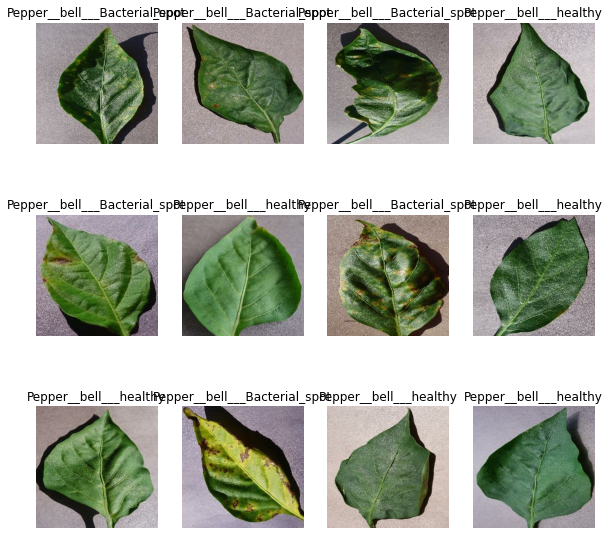

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
train_size = 0.8
len(dataset)*train_size

62.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

24

In [ ]:
val_size = 0.1
len(dataset)*val_size

7.800000000000001

In [ ]:
def get_dataset_partisions_tf(ds,trains_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    
    train_size = int(trains_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds = get_dataset_partisions_tf(dataset)

In [ ]:
len(train_ds)

62

In [ ]:
len(val_ds)

7

In [ ]:
len(test_ds)

9

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescales = Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_agmetation = Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
#building CNN
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 10

model = Sequential([
    resize_and_rescales,
    data_agmetation,
    
    layers.Conv2D(32,(3,3), activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/40
62/62 [==============================] - 204s 150ms/step - loss: 0.8568 - accuracy: 0.5232 - val_loss: 0.6746 - val_accuracy: 0.6607
Epoch 2/40
62/62 [==============================] - 4s 70ms/step - loss: 0.4562 - accuracy: 0.8039 - val_loss: 0.4044 - val_accuracy: 0.8929
Epoch 3/40
62/62 [==============================] - 4s 70ms/step - loss: 0.2774 - accuracy: 0.9119 - val_loss: 0.3490 - val_accuracy: 0.9464
Epoch 4/40
62/62 [==============================] - 4s 70ms/step - loss: 0.2402 - accuracy: 0.9328 - val_loss: 0.4151 - val_accuracy: 0.8973
Epoch 5/40
62/62 [==============================] - 4s 69ms/step - loss: 0.1418 - accuracy: 0.9526 - val_loss: 0.2867 - val_accuracy: 0.9911
Epoch 6/40
62/62 [==============================] - 4s 70ms/step - loss: 0.0948 - accuracy: 0.9812 - val_loss: 0.2212 - val_accuracy: 0.9821
Epoch 7/40
62/62 [==============================] - 4s 70ms/step - loss: 0.0574 - accuracy: 0.9842 - val_loss: 0.2737 - val_accuracy: 0.9241
Epoch 8/40

In [ ]:
scores = model.evaluate(test_ds)

9/9 [==============================] - 4s 32ms/step - loss: 0.0065 - accuracy: 0.9965


In [ ]:
scores

[0.006456033792346716, 0.9965277910232544]

In [ ]:
model.save("/content/drive/MyDrive/paperModel/testing")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/paperModel/testing/assets


Load save Model

In [ ]:
loadNewModel = tf.keras.models.load_model('/content/drive/MyDrive/paperModel/paper.h5')

In [ ]:
tf.__version__

'2.7.0'